In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [9]:
cv=pd.read_csv('car.data.csv',names=['buying','maint','doors','persons','lug_foot','safety','class'])
cv

,buying,maint,doors,persons,lug_foot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [10]:
cv.dtypes

buying      object
maint       object
doors       object
persons     object
lug_foot    object
safety      object
class       object
dtype: object

In [11]:
cv.shape

(1728, 7)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
#changing categorical value to numerical value
list1=['buying','maint','doors','persons','lug_foot','safety','class']
for val in list1:
    cv[val]=le.fit_transform(cv[val].astype(str))
cv

,buying,maint,doors,persons,lug_foot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [14]:
cv.describe()

,buying,maint,doors,persons,lug_foot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [15]:
cv.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_foot    0
safety      0
class       0
dtype: int64

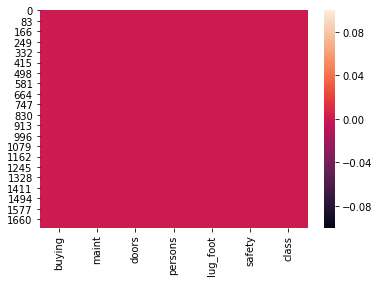

In [16]:
sns.heatmap(cv.isnull())

In [17]:
cv.corr()

,buying,maint,doors,persons,lug_foot,safety,class
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_foot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


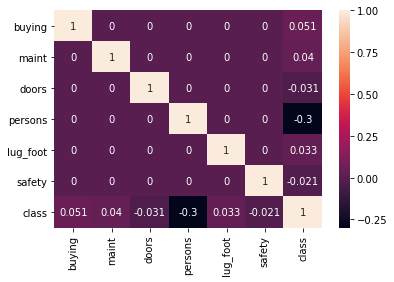

In [18]:
sns.heatmap(cv.corr(),annot=True)
plt.show()

In [19]:
import scipy.stats as stats
stats.skew(cv)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.98752502])

In [20]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(cv))
z

array([[1.34164079, 1.34164079, 1.34164079, ..., 1.22474487, 0.        ,
        0.51017691],
       [1.34164079, 1.34164079, 1.34164079, ..., 1.22474487, 1.22474487,
        0.51017691],
       [1.34164079, 1.34164079, 1.34164079, ..., 1.22474487, 1.22474487,
        0.51017691],
       ...,
       [0.4472136 , 0.4472136 , 1.34164079, ..., 1.22474487, 0.        ,
        0.51017691],
       [0.4472136 , 0.4472136 , 1.34164079, ..., 1.22474487, 1.22474487,
        0.63177348],
       [0.4472136 , 0.4472136 , 1.34164079, ..., 1.22474487, 1.22474487,
        1.65212731]])

In [21]:
threshold=3
print(np.where(z>3))
df=cv[(z<3).all(axis=1)]
df

(array([], dtype=int32), array([], dtype=int32))


,buying,maint,doors,persons,lug_foot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [22]:
cv.shape

(1728, 7)

In [23]:
df.shape

(1728, 7)

In [24]:
import scipy.stats as stats
stats.skew(df)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.98752502])

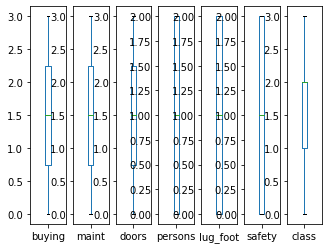

In [25]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(1,8), sharex=False, sharey=False)
plt.show()

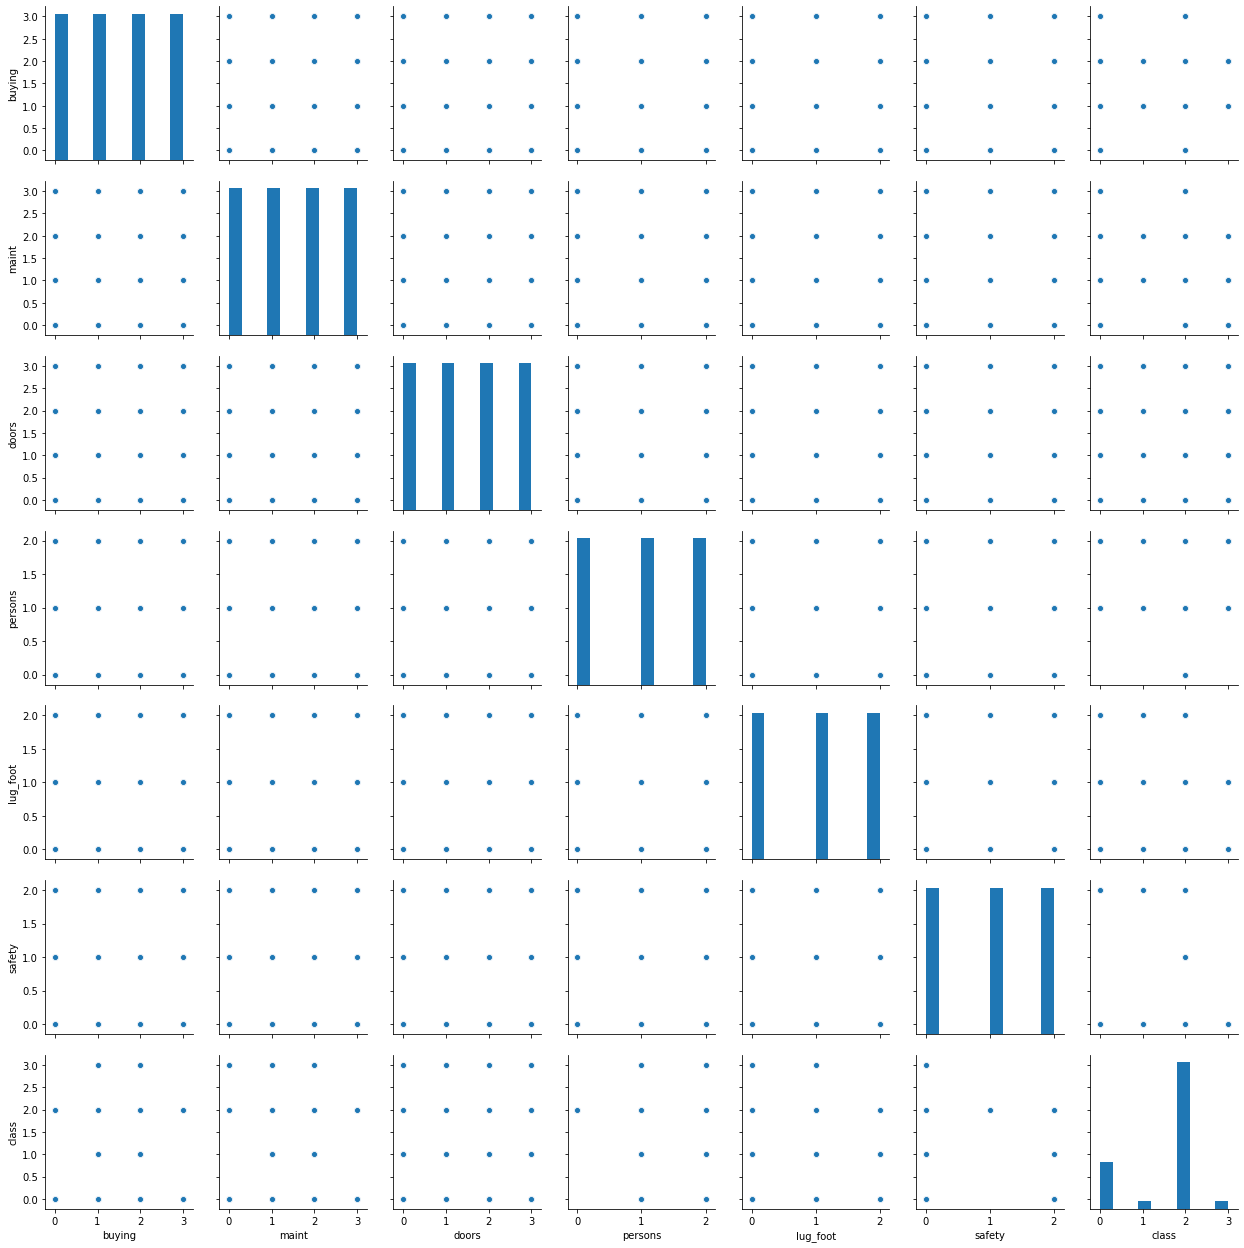

In [26]:
sns.pairplot(df,height=2.5)
plt.show()

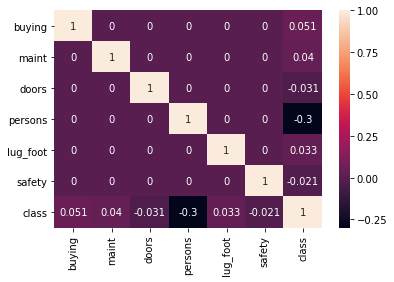

In [27]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [28]:
df.head()

,buying,maint,doors,persons,lug_foot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [30]:
x=df.drop("class",axis=1)

In [31]:
y=df["class"]

In [32]:
print(x.shape)
print(y.shape)

(1728, 6)
(1728,)


In [33]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=55)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 6)
(381, 6)
(1347,)
(381,)


In [36]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7322834645669292
[[ 14   0  61   0]
 [  0   0  11   0]
 [ 11   0 265   0]
 [ 11   0   8   0]]
              precision    recall  f1-score   support

           0       0.39      0.19      0.25        75
           1       0.00      0.00      0.00        11
           2       0.77      0.96      0.85       276
           3       0.00      0.00      0.00        19

    accuracy                           0.73       381
   macro avg       0.29      0.29      0.28       381
weighted avg       0.63      0.73      0.67       381



In [37]:
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.655 (0.085)


In [38]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6745406824146981
[[  7   0  27  41]
 [  1   0   4   6]
 [  6   0 231  39]
 [  0   0   0  19]]
              precision    recall  f1-score   support

           0       0.50      0.09      0.16        75
           1       0.00      0.00      0.00        11
           2       0.88      0.84      0.86       276
           3       0.18      1.00      0.31        19

    accuracy                           0.67       381
   macro avg       0.39      0.48      0.33       381
weighted avg       0.75      0.67      0.67       381



In [39]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9186351706036745
[[ 66   1   8   0]
 [  7   4   0   0]
 [ 13   0 263   0]
 [  2   0   0  17]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        75
           1       0.80      0.36      0.50        11
           2       0.97      0.95      0.96       276
           3       1.00      0.89      0.94        19

    accuracy                           0.92       381
   macro avg       0.88      0.77      0.80       381
weighted avg       0.92      0.92      0.92       381



In [40]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.984251968503937
[[ 72   1   2   0]
 [  1  10   0   0]
 [  2   0 274   0]
 [  0   0   0  19]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.91      0.91      0.91        11
           2       0.99      0.99      0.99       276
           3       1.00      1.00      1.00        19

    accuracy                           0.98       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.98      0.98      0.98       381



In [41]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.926509186351706
[[ 64   3   8   0]
 [  8   3   0   0]
 [  4   0 272   0]
 [  5   0   0  14]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.50      0.27      0.35        11
           2       0.97      0.99      0.98       276
           3       1.00      0.74      0.85        19

    accuracy                           0.93       381
   macro avg       0.82      0.71      0.75       381
weighted avg       0.92      0.93      0.92       381



In [42]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [43]:
svmkernel('poly')

0.7874015748031497
[[ 31   0  44   0]
 [  3   0   8   0]
 [ 11   0 265   0]
 [  9   0   6   4]]
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        75
           1       0.00      0.00      0.00        11
           2       0.82      0.96      0.88       276
           3       1.00      0.21      0.35        19

    accuracy                           0.79       381
   macro avg       0.60      0.40      0.43       381
weighted avg       0.76      0.79      0.75       381



In [44]:
svmkernel('linear')

0.7532808398950132
[[ 13   0  62   0]
 [  0   0  11   0]
 [  2   0 274   0]
 [ 11   0   8   0]]
              precision    recall  f1-score   support

           0       0.50      0.17      0.26        75
           1       0.00      0.00      0.00        11
           2       0.77      0.99      0.87       276
           3       0.00      0.00      0.00        19

    accuracy                           0.75       381
   macro avg       0.32      0.29      0.28       381
weighted avg       0.66      0.75      0.68       381



In [45]:
svmkernel('rbf')

0.9186351706036745
[[ 66   1   8   0]
 [  7   4   0   0]
 [ 13   0 263   0]
 [  2   0   0  17]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        75
           1       0.80      0.36      0.50        11
           2       0.97      0.95      0.96       276
           3       1.00      0.89      0.94        19

    accuracy                           0.92       381
   macro avg       0.88      0.77      0.80       381
weighted avg       0.92      0.92      0.92       381



In [46]:
#comparision table
lg=print('lg:',(accuracy_score(y_test,pred)))
gnb=print('gnb:',(accuracy_score(y_test,predgnb)))
svc=print('svc:',(accuracy_score(y_test,predsvc)))
dtc=print('dtc:',(accuracy_score(y_test,preddtc)))
knn=print('knn:',(accuracy_score(y_test,predknn)))

lg: 0.7322834645669292
gnb: 0.6745406824146981
svc: 0.9186351706036745
dtc: 0.984251968503937
knn: 0.926509186351706


In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.979002624671916
[[ 71   1   3   0]
 [  1  10   0   0]
 [  3   0 273   0]
 [  0   0   0  19]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.91      0.91      0.91        11
           2       0.99      0.99      0.99       276
           3       1.00      1.00      1.00        19

    accuracy                           0.98       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.98      0.98      0.98       381



#here we can see 'Decision Tree' is performing well 

# Using cross validation score

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [49]:
dtc=DecisionTreeClassifier()

In [50]:
score=cross_val_score(dtc,x,y,cv=20)
print('score:',score)

score: [0.96629213 0.98876404 0.97752809 0.97752809 0.98863636 0.98850575
 0.96551724 0.90804598 0.97701149 1.         1.         0.94117647
 0.96470588 0.95294118 0.85882353 0.97647059 1.         0.91764706
 1.         0.92941176]


In [51]:
print('Mean scores:',score.mean())

Mean scores: 0.9639502826772638


In [52]:
print('std deviation:',score.std())

std deviation: 0.03597545872073275


Here no need to apply cross validation because we have already got 98% accuracy in Decision Tree model

In [53]:
import pandas
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.918 (0.074)


In kFold cross validation process we also got to know that the machine is learning more than 90%.

In [54]:
from sklearn.externals import joblib

In [55]:
#saving the model as pickl
joblib.dump(dtc,"Project 13_car value.pkl")

['Project 13_car value.pkl']